In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns

In [17]:
data_train = pd.read_csv("/Users/wbm/Documents/Skilvul/appliance_data.csv")
data_train.head(50)

,Voltage (V),Ampere (A),Timestamp,Device ID
0,4.5,0.36,2024-03-01 00:00:00,TV
1,4.5,0.05,2024-03-01 00:05:00,TV
2,4.5,0.05,2024-03-01 00:10:00,TV
3,4.5,0.49,2024-03-01 00:15:00,TV
4,4.5,0.47,2024-03-01 00:20:00,TV
5,4.5,0.31,2024-03-01 00:25:00,TV
6,4.5,0.02,2024-03-01 00:30:00,TV
7,4.5,0.49,2024-03-01 00:35:00,TV
8,4.5,0.13,2024-03-01 00:40:00,TV
9,4.5,0.29,2024-03-01 00:45:00,TV


In [9]:
statistics = data_train.describe()

print(statistics)

        Voltage (V)    Ampere (A)
count  10080.000000  10080.000000
mean       8.500000      0.866364
std        5.674786      1.145980
min        3.000000      0.000000
25%        4.500000      0.090000
50%        5.000000      0.400000
75%       12.000000      1.080000
max       18.000000      5.000000


In [24]:
# Rename columns
data_train.rename(columns={'Ampere (A)': 'Ampere', 'Voltage (V)': 'Voltage', 'Device ID': 'Device'}, inplace=True)

data_train.head()

,Voltage,Ampere,Timestamp,Device
0,4.5,0.36,2024-03-01 00:00:00,TV
1,4.5,0.05,2024-03-01 00:05:00,TV
2,4.5,0.05,2024-03-01 00:10:00,TV
3,4.5,0.49,2024-03-01 00:15:00,TV
4,4.5,0.47,2024-03-01 00:20:00,TV


In [11]:
# Find the earliest and latest timestamps
earliest_timestamp = data_train["Timestamp"].min()
latest_timestamp = data_train["Timestamp"].max()

print("Earliest Timestamp:", earliest_timestamp)
print("Latest Timestamp:", latest_timestamp)

Earliest Timestamp: 2024-03-01 00:00:00
Latest Timestamp: 2024-03-07 23:55:00


In [14]:
# Size of the dataset
dataset_size = data_train.shape

print("Dataset Size:", dataset_size)

Dataset Size: (10080, 4)


In [18]:
# Check for missing values
missing_data = data_train.isnull().sum()
print("Missing values in each column:\n", missing_data)

Missing values in each column:
 Voltage (V)    0
Ampere (A)     0
Timestamp      0
Device ID      0
dtype: int64


In [26]:
# Check for anomalies (negative measurement)
anomalies = data_train[(data_train['Ampere'] < 0) | (data_train['Voltage'] < 0)]
print("Anomalous records with negative values:", anomalies)

Anomalous records with negative values: Empty DataFrame
Columns: [Voltage, Ampere, Timestamp, Device]
Index: []


In [28]:
#Calculate Power in watts
data_train['Power'] = data_train['Voltage'] * data_train['Ampere']

# Calculate energy in watt-hours (5-minutes interval)
data_train["Energy"] = data_train["Power"] * (5/60)

In [29]:
print(data_train.head())

   Voltage  Ampere            Timestamp Device  Power   Energy
0      4.5    0.36  2024-03-01 00:00:00     TV  1.620  0.13500
1      4.5    0.05  2024-03-01 00:05:00     TV  0.225  0.01875
2      4.5    0.05  2024-03-01 00:10:00     TV  0.225  0.01875
3      4.5    0.49  2024-03-01 00:15:00     TV  2.205  0.18375
4      4.5    0.47  2024-03-01 00:20:00     TV  2.115  0.17625


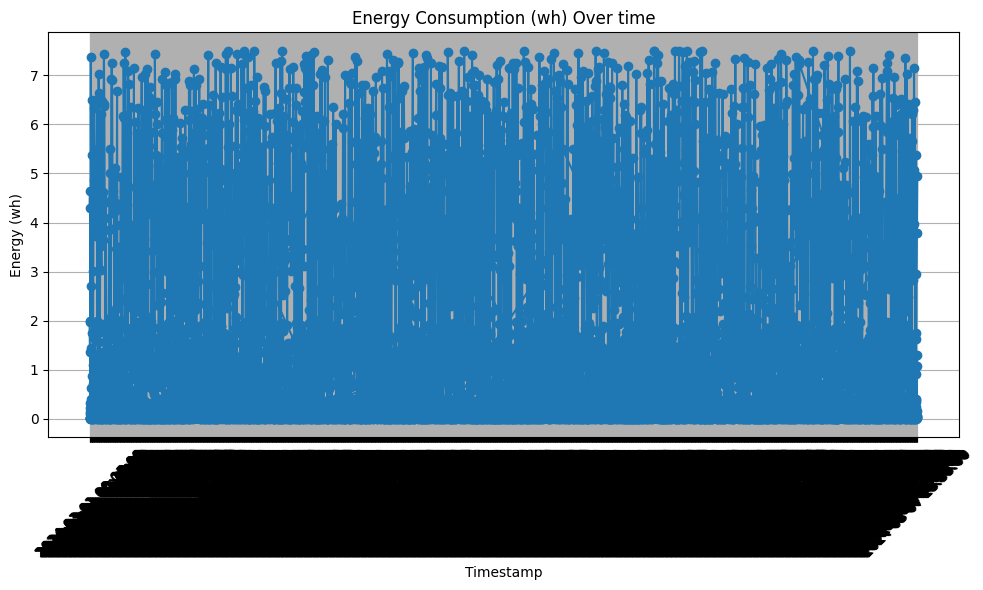

In [30]:
# Plot the energy, too see siklus

plt.figure(figsize=(10,6))
plt.plot(data_train['Timestamp'], data_train['Energy'], marker='o', linestyle='-')
plt.title('Energy Consumption (wh) Over time')
plt.xlabel('Timestamp')
plt.ylabel('Energy (wh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
# Extract additional time features

# Convert 'Timestamp' to datetime
data_train['Timestamp'] = pd.to_datetime(data_train['Timestamp'])

# Additional Timeseries
data_train['Hour'] = data_train['Timestamp'].dt.hour
data_train['DayOfWeek'] = data_train['Timestamp'].dt.dayofweek # Monday=0, Sunday=6
data_train['IsWeekend'] = data_train['DayOfWeek'].isin([5,6]).astype(int)
data_train['IsPeakHours'] = data_train['Hour'].apply(lambda x: 1 if 18 <= x <= 22 else 0)

In [58]:
print(data_train.head(500))

     Voltage  Ampere           Timestamp Device   Power   Energy  Hour  \
0        4.5    0.36 2024-03-01 00:00:00     TV   1.620  0.13500     0   
1        4.5    0.05 2024-03-01 00:05:00     TV   0.225  0.01875     0   
2        4.5    0.05 2024-03-01 00:10:00     TV   0.225  0.01875     0   
3        4.5    0.49 2024-03-01 00:15:00     TV   2.205  0.18375     0   
4        4.5    0.47 2024-03-01 00:20:00     TV   2.115  0.17625     0   
..       ...     ...                 ...    ...     ...      ...   ...   
495     18.0    4.62 2024-03-01 17:15:00     AC  83.160  6.93000    17   
496     18.0    3.28 2024-03-01 17:20:00     AC  59.040  4.92000    17   
497     18.0    4.68 2024-03-01 17:25:00     AC  84.240  7.02000    17   
498     18.0    3.27 2024-03-01 17:30:00     AC  58.860  4.90500    17   
499     18.0    0.98 2024-03-01 17:35:00     AC  17.640  1.47000    17   

     DayOfWeek  IsWeekend  IsPeakHours  
0            4          0            0  
1            4          0    

In [125]:
# Dataframe for ranking the devices energy consumption
energy_per_hour_per_device = data_train[['Timestamp', 'Device', 'Energy']].copy()

# Save the the dataframe to local device
energy_per_hour_per_device.to_csv('/Users/wbm/Documents/Skilvul/Web App Energy Consumption/energy_per_hour_per_device.csv', index=True)

In [60]:
# Aggregate energy consumption per hour
energy_per_hour = data_train.groupby(data_train['Timestamp'].dt.floor('H')).agg({'Energy': 'sum'}).reset_index()
print(energy_per_hour)

              Timestamp     Energy
0   2024-03-01 00:00:00  63.099583
1   2024-03-01 01:00:00  73.642083
2   2024-03-01 02:00:00  68.470417
3   2024-03-01 03:00:00  41.939583
4   2024-03-01 04:00:00  74.676250
..                  ...        ...
163 2024-03-07 19:00:00  64.773333
164 2024-03-07 20:00:00  62.413750
165 2024-03-07 21:00:00  57.862500
166 2024-03-07 22:00:00  64.057917
167 2024-03-07 23:00:00  67.002917

[168 rows x 2 columns]


In [123]:
# Save the all dataframe to local device
energy_per_hour.to_csv('/Users/wbm/Documents/Skilvul/Web App Energy Consumption/energy_per_hour.csv', index=True)

/var/folders/15/_nms3dx938z02zxw1j0ns_4h4n_pl4/T/ipykernel_42103/1303061014.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(tick_labels)


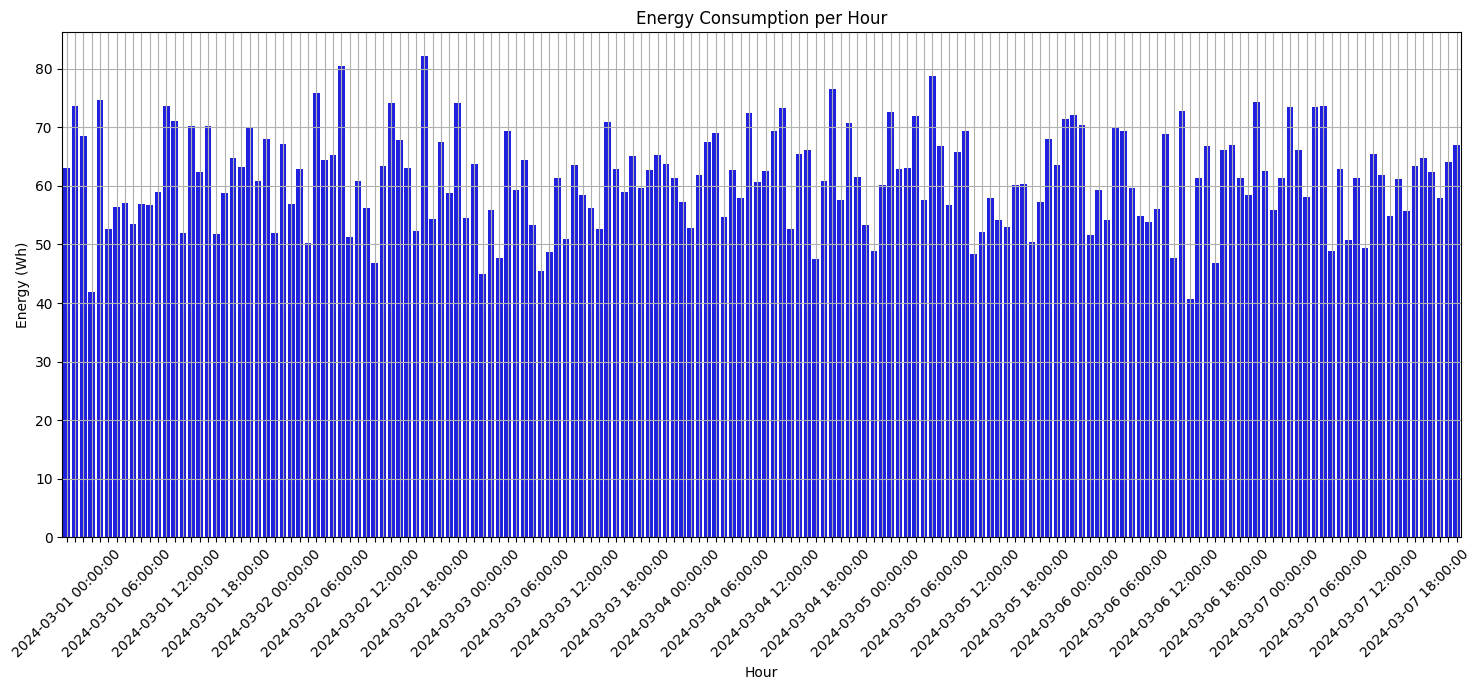

In [67]:
#plotting the energy consumption per hout

plt.figure(figsize=(15, 7))

sns.barplot(x='Timestamp', y='Energy', data=energy_per_hour, color='blue')
plt.title('Energy Consumption per Hour')
plt.xlabel('Hour')
plt.ylabel('Energy (Wh)')
plt.xticks(rotation=45)

# Customizes the x-ticks to show fewer labels to prevent overlap
tick_labels = plt.gca().get_xticklabels()
# Assuming you want to show a label every 6 hours
tick_labels = [label if i % 6 == 0 else "" for i, label in enumerate(tick_labels)]
plt.gca().set_xticklabels(tick_labels)

plt.grid(True)
plt.tight_layout()
plt.show()

In [74]:
# Is the data stationary
# Dicky-Fuller Test

from statsmodels.tsa.stattools import adfuller

# Extract energy values from the DataFrame
energy_values = energy_per_hour['Energy']

# Perform the Dickey-Fuller test
adf, pvalue, usedlag_, nobs_, critical_values, icbest = adfuller(energy_values)

# Print the results
print(f'ADF Statistic: {adf}')
print(f'p-value: {pvalue}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

ADF Statistic: -14.379517671833858
p-value: 9.20321357011859e-27
Critical Values:
   1%: -3.470126426071447
   5%: -2.8790075987120027
   10%: -2.5760826967621644


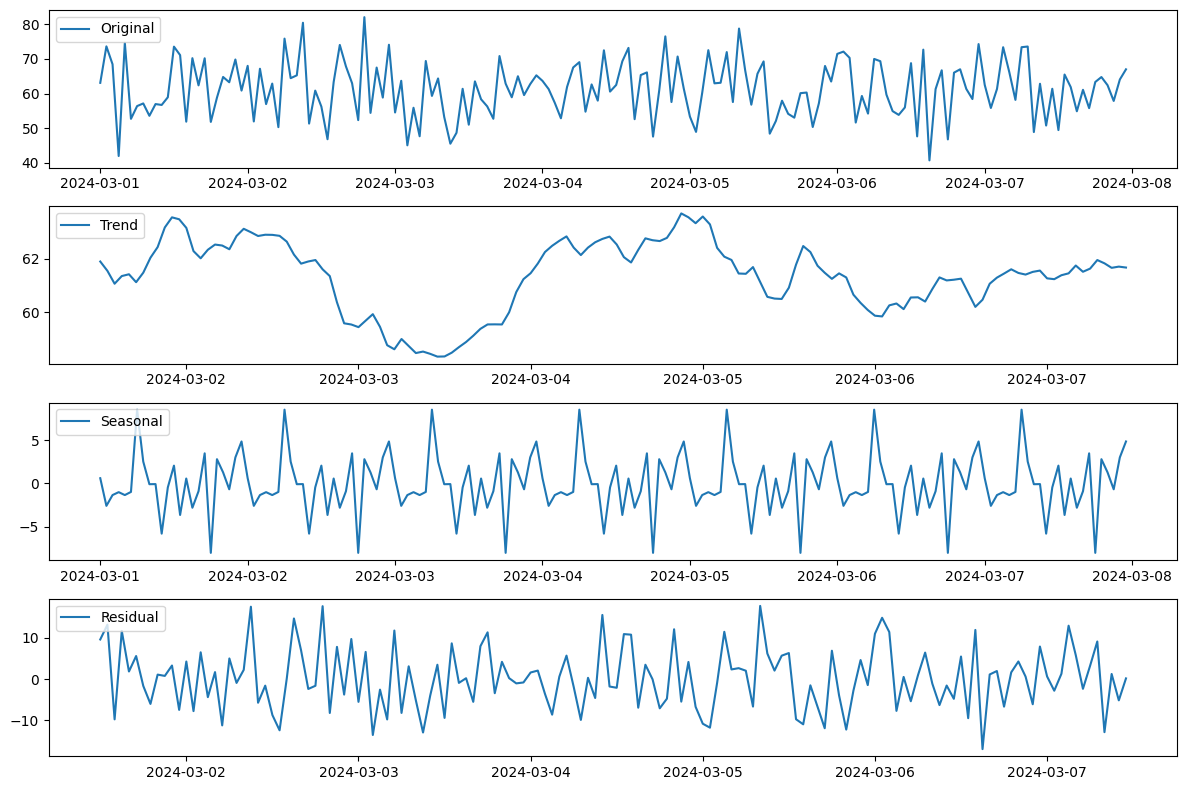

In [90]:
# Extract and Plot Trend, Seasonal and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposed = seasonal_decompose(energy_per_hour['Energy'], model='additive')

# Plot the original data
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(energy_per_hour.index, energy_per_hour['Energy'], label='Original')
plt.legend(loc='upper left')

# Plot the trend component
plt.subplot(412)
plt.plot(energy_per_hour.index, decomposed.trend, label='Trend')
plt.legend(loc='upper left')

# Plot the seasonal component
plt.subplot(413)
plt.plot(energy_per_hour.index, decomposed.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# Plot the residual component
plt.subplot(414)
plt.plot(energy_per_hour.index, decomposed.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [92]:
from pmdarima.arima import auto_arima

arima_model = auto_arima(energy_per_hour['Energy'], start_p=1, d=1, start_q=1,
                        max_p=5, max_q=5, max_d=5, m=12,
                        start_P=0, D=1, start_Q=0, max_D=5, max_Q=5,
                        seasonal = True,
                        trace = True,
                        error_action = 'ignore',
                        suppress_warnings= True,
                        stepwise = True, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1329.526, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1242.633, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1273.603, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1222.192, Time=0.37 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.96 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.66 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1283.434, Time=0.21 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1208.589, Time=0.43 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=1222.187, Time=0.14 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=2.83 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.79 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=1201.523, Time=0.39 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=1213.8

In [93]:
print(arima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  168
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -594.761
Date:                            Mon, 29 Apr 2024   AIC                           1201.523
Time:                                    22:28:44   BIC                           1219.784
Sample:                                03-01-2024   HQIC                          1208.940
                                     - 03-07-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8345      0.092     -9.056      0.000      -1.015      -0.654
ar.L2         -0.5057      0.104   

In [95]:
# Split data into train and test
size = int(len(energy_per_hour) * 0.66)
X_train, X_test = energy_per_hour[0:size], energy_per_hour[size:len(energy_per_hour)]

In [99]:
# Fit a SARIMAX(3, 1, 0)x(2, 1, 0, 12) on the training dataset
from statsmodels.tsa.statespace.sarimax import SARIMAX

X_train.index.freq = X_train.index.inferred_freq

model = SARIMAX(X_train['Energy'],
               order = (3, 1, 1),
               seasonal_order = (2, 1, 0, 12))

result = model.fit()
result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.43719D+00    |proj g|=  1.00157D-01

At iterate    5    f=  3.38309D+00    |proj g|=  5.03881D-02


 This problem is unconstrained.



At iterate   10    f=  3.34902D+00    |proj g|=  2.37143D-02

At iterate   15    f=  3.34814D+00    |proj g|=  3.69441D-03

At iterate   20    f=  3.34797D+00    |proj g|=  1.72084D-03

At iterate   25    f=  3.34795D+00    |proj g|=  2.00633D-04

At iterate   30    f=  3.34795D+00    |proj g|=  6.04594D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     39      1     0     0   9.450D-06   3.348D+00
  F =   3.3479504775895470     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              Energy   No. Observations:                  110
Model:             SARIMAX(3, 1, 1)x(2, 1, [], 12)   Log Likelihood                -368.275
Date:                             Mon, 29 Apr 2024   AIC                            750.549
Time:                                     22:40:14   BIC                            768.572
Sample:                                 03-01-2024   HQIC                           757.837
                                      - 03-05-2024                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0973      0.118     -0.825      0.409      -0.328       0.134
ar.L2          0.0774      0.116      0.666      0.505      -0.150       0.305
ar.L3         -0.0387      0.114     -0.340      0.734      -0.262       0.184
ma.L1         -0.9976      0.476     -2.096      0.036      -1.930      -0.065
ar.S.L12      -0.5205      0.119     -4.387      0.000      -0.753      -0.288
ar.S.L24      -0.2275      0.129     -1.763      0.078      -0.480       0.025
sigma2       105.7680     49.804      2.124      0.034       8.154     203.382
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.99
Prob(Q):                              0.99   Prob(JB):                         0.61
Heteroskedasticity (H):               0.73   Skew:                            -0.07
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [108]:
# Train prediction
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index, end_index)

# Prediction
start_index = len(X_train)
end_index = len(energy_per_hour)-1
prediction = result.predict(start_index, end_index).rename('Predicted Hourly Energy Consumption') 

In [105]:
print(X_train)

                        Energy
Timestamp                     
2024-03-01 00:00:00  63.099583
2024-03-01 01:00:00  73.642083
2024-03-01 02:00:00  68.470417
2024-03-01 03:00:00  41.939583
2024-03-01 04:00:00  74.676250
...                        ...
2024-03-05 09:00:00  66.709583
2024-03-05 10:00:00  56.774167
2024-03-05 11:00:00  65.718333
2024-03-05 12:00:00  69.292500
2024-03-05 13:00:00  48.401667

[110 rows x 1 columns]


In [106]:
print(train_prediction)

Timestamp
2024-03-01 00:00:00     0.000000
2024-03-01 01:00:00    63.093860
2024-03-01 02:00:00    73.641697
2024-03-01 03:00:00    68.470902
2024-03-01 04:00:00    41.944250
                         ...    
2024-03-05 09:00:00    57.112497
2024-03-05 10:00:00    69.940320
2024-03-05 11:00:00    64.070336
2024-03-05 12:00:00    57.193249
2024-03-05 13:00:00    58.055063
Freq: H, Name: predicted_mean, Length: 110, dtype: float64


<Axes: xlabel='Timestamp'>

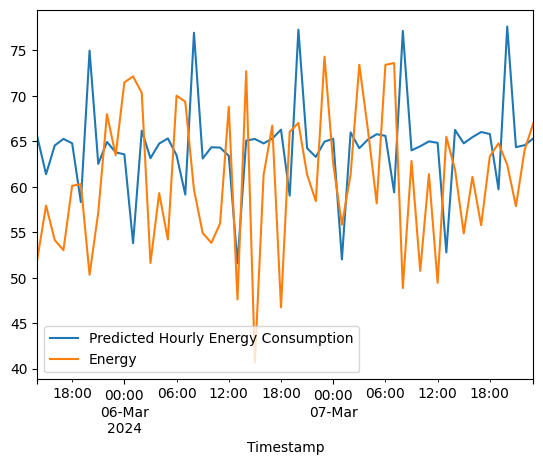

In [109]:
# Plot predictions and actual values
prediction.plot(legend=True)
X_test['Energy'].plot(legend=True)

In [126]:
import math
from sklearn.metrics import mean_squared_error

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(X_train, train_prediction))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(X_test, prediction))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 12.93 RMSE
Test Score: 10.41 RMSE


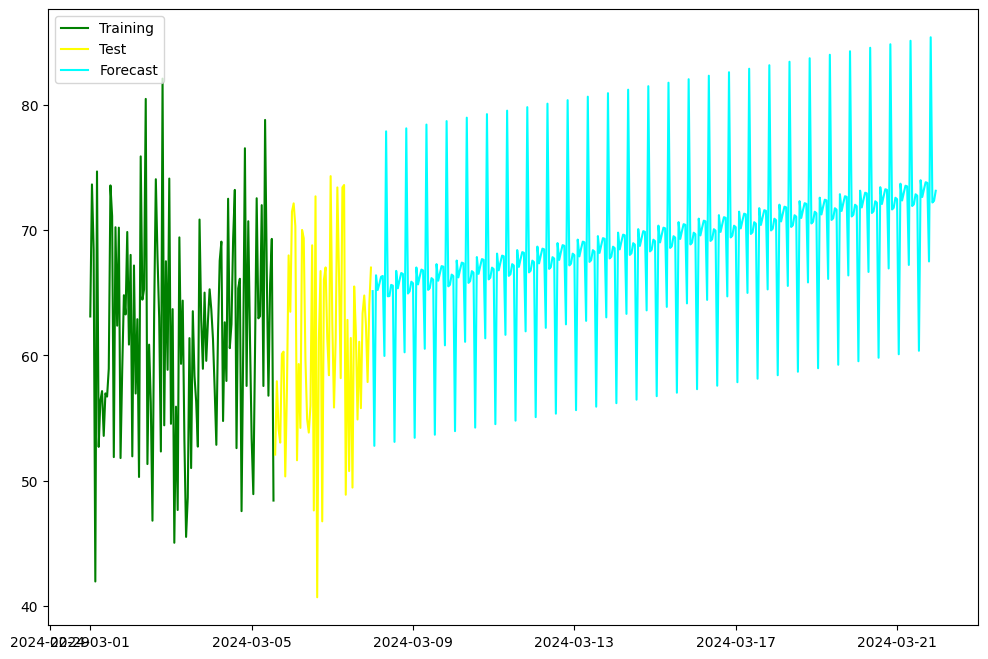

In [117]:
# Forecast for the next 1 week
forecast = result.predict(start=len(energy_per_hour),
                          end=(len(energy_per_hour) - 1) + 14 * 24).rename('Forecast')

plt.figure(figsize=(12,8))
plt.plot(X_train, label='Training', color='green')
plt.plot(X_test, label='Test', color='yellow')
plt.plot(forecast, label='Forecast', color='cyan')
plt.legend(loc='upper left')
plt.show()

In [119]:
# Save the all dataframe to local device
X_train.to_csv('/Users/wbm/Documents/Skilvul/Web App Energy Consumption/X_train.csv', index=True)
X_test.to_csv('/Users/wbm/Documents/Skilvul/Web App Energy Consumption/X_test.csv', index=True)
forecast.to_csv('/Users/wbm/Documents/Skilvul/Web App Energy Consumption/forecast.csv', index=True)



In [120]:
print(X_train.head())

                        Energy
Timestamp                     
2024-03-01 00:00:00  63.099583
2024-03-01 01:00:00  73.642083
2024-03-01 02:00:00  68.470417
2024-03-01 03:00:00  41.939583
2024-03-01 04:00:00  74.676250


In [121]:
print(X_test.head())

                        Energy
Timestamp                     
2024-03-05 14:00:00  52.074167
2024-03-05 15:00:00  57.931250
2024-03-05 16:00:00  54.135417
2024-03-05 17:00:00  53.028750
2024-03-05 18:00:00  60.110000


In [122]:
print(forecast.head())

2024-03-08 00:00:00    65.124011
2024-03-08 01:00:00    52.770325
2024-03-08 02:00:00    66.387871
2024-03-08 03:00:00    65.210739
2024-03-08 04:00:00    65.708206
Freq: H, Name: Forecast, dtype: float64
